In [1]:
#Muticlass Classification

#Muticlass Classification is a classification task which has 'one target variable' 
#and that target variable can be more than 2 classes 

In [2]:
import warnings
warnings.warn = lambda *a, **kw: False


from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
mnist_raw = loadmat("mnist-original.mat")
X, Y = mnist_raw['data'].T, mnist_raw['label'].T
x_train, y_train, x_test, y_test = X[:60000], Y[:60000], X[60000:], Y[60000:]

shuffled_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffled_index], y_train[shuffled_index]
some_digit = X[36000]

In [3]:
#some algorithms are capable of handlingmuticlass classification directly (eg. RandomForest, Bayes classifier)
#but some algoritms(e.g. SGDClassification) do not have that capability (they support only binary classification)
#So, there are 2 ways to create muticlass classifier
#1. OvA: create binary classifiers equal to the number of classes. each clf responsible for classifing each classes
#2. OvO: create binary classifiers equal to the number of each pairs of class. each clf responsible for ditinguish between that pair of classes

In [4]:
#create muticlassifier using SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

print("prediction of some_digit is", sgd_clf.predict([some_digit]))


#you can look at the decision score of each classifier
#and the highest score is corresponding to class 5
print ("score for each classes are ")
print (sgd_clf.decision_function([some_digit]))

prediction of some_digit is [5.]
score for each classes are 
[[-153923.52198922 -486644.46688679 -286498.2168477  -340845.58722146
  -693257.44696948  125901.14430063 -749653.08619951 -302342.38634504
  -751804.14744068 -582870.20328762]]


In [5]:
#try OvO method
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)

print ("prediction of some_digit")
ovo_clf.predict([some_digit])
print ("number of classifier", len(ovo_clf.estimators_))

prediction of some_digit
number of classifier 45


In [6]:
#try RandomForest which can handle muticlass directly
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)

forest_clf.predict([some_digit])

array([5.])

In [7]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [8]:
#next, try to evaluate model performance using cross-validation
from sklearn.model_selection import cross_val_score
sgd_accuracy_scores = cross_val_score(SGDClassifier(random_state=42), x_train, y_train, cv=3, scoring='accuracy')
sgd_accuracy_scores
#you can use accuracy as measurement metric because the number of instances for each classes are balance

array([0.83193361, 0.8460923 , 0.84727709])

In [9]:
#improve SGDClassifer using Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
sgd_scaledfeature_accuracy_scores = cross_val_score(SGDClassifier(random_state=42), x_train_scaled, y_train, cv=3, scoring='accuracy')
sgd_scaledfeature_accuracy_scores

array([0.91156769, 0.91054553, 0.9093364 ])

In [10]:
#the results are better because of feature scaling

In [11]:
#Error Analysis
#let's look at confusion matrix of the model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
sgd_y_pred = cross_val_predict(SGDClassifier(random_state=42), x_train, y_train, cv=3)
sgd_conf_mx = confusion_matrix(y_train, sgd_y_pred)
sgd_conf_mx

array([[5486,    1,   69,   38,   22,   58,  104,    9,  116,   20],
       [   1, 6349,   50,   17,   11,    9,   17,   19,  261,    8],
       [  32,  103, 4882,  177,  127,   20,  204,  121,  269,   23],
       [  19,   46,  272, 5060,   34,  184,   48,  131,  237,  100],
       [   6,   27,   35,    6, 5299,   13,   61,   12,  124,  259],
       [  47,   38,   74,  263,  203, 4127,  165,   37,  382,   85],
       [  16,   24,   40,    6,   59,   76, 5607,    1,   87,    2],
       [  28,   39,   95,   55,  112,   15,    7, 5211,   70,  633],
       [  19,  194,   99,  188,  268,  257,   84,   68, 4576,   98],
       [  25,   56,   20,   70, 1073,   49,    5,  657,   85, 3909]])

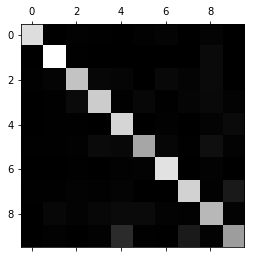

In [12]:
#it is more convinient to look of an image representing this matrix
plt.matshow(sgd_conf_mx, cmap=plt.cm.gray)
plt.show()

In [13]:
#the square representing the TP of 5 are pretty dark which means the model does not perform well on predicting 5 
#or it can means that there fewer 5 in training set

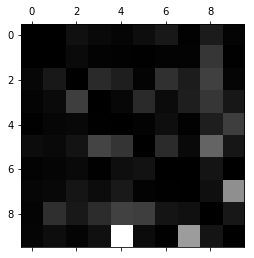

In [14]:
#let's get rid of the diagonal squares and compute error ratios
row_sums = sgd_conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = sgd_conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [15]:
#it seems like model often wrongly classify 5s as 3s and 8s
#and 9s are often wrongly classify as 7

In [16]:
#let's look at the images that are wrongly classified
# five_as_three = x_train[(y_train == 5) & (sgd_y_pred == 3)]
# five_as_eight = x_train[(y_train == 5) & (sgd_y_pred == 8)]
# nine_as_seven = x_train[(y_train == 9) & (sgd_y_pred == 7)]

# plt.figure(figsize=(8,8))
# plt.subplot(221); plot_digit(five_as_three[:25], images_per_row=5)
# plt.show()

In [17]:
#MutiLabel classification 
#In MutiLabel classification, classifier will output more than 1 label(e.g. [0, 1])

#let create model to predict if images are large number and if images are odd
y_train_large = (y_train > 7)
y_train_odd = (y_train % 2 == 1)
y_train_mutilabel = np.c_[y_train_large, y_train_odd]
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train_mutilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [18]:
#evaluate mutilabel classifier using F1 score
# from sklearn.metrics import f1_score
# y_train_pred = cross_val_predict(knn_clf, x_train, y_train_mutilabel, cv=3)
# f1_score(y_train_mutilabel, y_train_pred, average='macro')

In [19]:
#macro average give weight to each label eqaully 
#if the number of labels are not balance you may give more weight to that label(using weighted average)

In [29]:
#the last type of classification 
#Mutioutput Classification
#mutioutput classification has many target label and each label can be more than 2 classes

#try to create classifier that remove noise from image
#first, we create noisy image
train_noise = np.random.randint(0, 100, (len(x_train), 784))
test_noise = np.random.randint(0, 100, (len(x_test), 784))

x_train_noisy = x_train + train_noise
y_train_clear = x_train

x_test_noisy = x_test + test_noise
y_test_clear = x_test

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_noisy, y_train_clear)
y_train_pred = knn_clf.predict([x_train_noisy[33000]])

original noisy


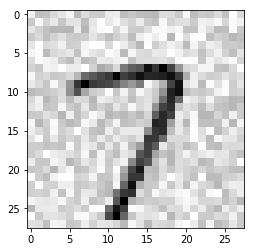

In [30]:
%matplotlib inline
print ("original noisy")
plt.imshow(x_train_noisy[33000].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

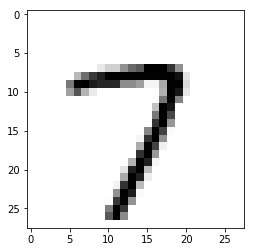

In [31]:
plt.imshow(y_train_clear[33000].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

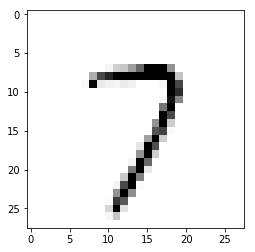

In [32]:
plt.imshow(y_train_pred.reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()